In [8]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
from MCForecastTools import MCSimulation

%matplotlib inline

In [9]:
load_dotenv()

True

In [10]:
alpaca_secret_key = 'rXoCM9s8Zug4baosmoqZ52Quo1HTE4APznEqHRdk'

In [11]:
alpaca_api_key = 'PKQ7AGGJ1RU7HOMRQRKM'

In [12]:
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

Joes Monte Carlo Simulation

In [13]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2018-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["GM","TACO","AUY","BABA","PTON"]

# Get 5 year's worth of historical price data
joes_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
joes_ticker.head()

AUY                                 BABA          \
                           open  high     low close   volume    open    high   
time                                                                           
2018-05-24 00:00:00-04:00  2.84  2.92  2.8258  2.91  8418694  198.12  199.72   
2018-05-25 00:00:00-04:00  2.90  2.94  2.8600  2.86  8681001  197.57  201.50   
2018-05-29 00:00:00-04:00  2.83  2.90  2.8100  2.87  6205123  197.94  202.28   
2018-05-30 00:00:00-04:00  2.88  2.95  2.8730  2.91  7032656  199.70  200.54   
2018-05-31 00:00:00-04:00  2.91  2.94  2.8900  2.92  8482293  198.00  199.48   

                                                       ... PTON           \
                                low   close    volume  ... open high low   
time                                                   ...                 
2018-05-24 00:00:00-04:00  195.6974  197.36  14616812  ...  NaN  NaN NaN   
2018-05-25 00:00:00-04:00  197.2100  199.18  17548460  ...  NaN  NaN NaN   
2018-05-29 00:00:00-04:00  197.0000  197.92  15298659  ...  NaN  NaN NaN   
2018-05-30 00:00:00-04:00  197.5000  198.00  11140140  ...  NaN  NaN NaN   
2018-05-31 00:00:00-04:00  196.8500  198.10  11583622  ...  NaN  NaN NaN   

                                         TACO                                 
                          close volume   open   high    low  close    volume  
time                                                                          
2018-05-24 00:00:00-04:00   NaN    NaN  11.77  11.84  11.53  11.55  183250.0  
2018-05-25 00:00:00-04:00   NaN    NaN  11.54  12.17  11.54  12.07  409256.0  
2018-05-29 00:00:00-04:00   NaN    NaN  12.05  12.12  11.79  11.89  198195.0  
2018-05-30 00:00:00-04:00   NaN    NaN  11.90  12.23  11.90  12.21  187752.0  
2018-05-31 00:00:00-04:00   NaN    NaN  12.26  12.43  12.00  12.03  149811.0  

[5 rows x 25 columns]

In [14]:
# Configure a Monte Carlo simulation to forecast twenty years cumulative returns
joes_MC_even_dist = MCSimulation(
    portfolio_data = joes_ticker,
    weights = [.2, .2, .2, .2, .2],
    num_simulation = 500,
    num_trading_days = 252*20
)

# Print the simulation input data
joes_MC_even_dist.portfolio_data.head()

AUY                                            \
                           open  high     low close   volume daily_return   
time                                                                        
2018-05-24 00:00:00-04:00  2.84  2.92  2.8258  2.91  8418694          NaN   
2018-05-25 00:00:00-04:00  2.90  2.94  2.8600  2.86  8681001    -0.017182   
2018-05-29 00:00:00-04:00  2.83  2.90  2.8100  2.87  6205123     0.003497   
2018-05-30 00:00:00-04:00  2.88  2.95  2.8730  2.91  7032656     0.013937   
2018-05-31 00:00:00-04:00  2.91  2.94  2.8900  2.92  8482293     0.003436   

                             BABA                            ... PTON        \
                             open    high       low   close  ...  low close   
time                                                         ...              
2018-05-24 00:00:00-04:00  198.12  199.72  195.6974  197.36  ...  NaN   NaN   
2018-05-25 00:00:00-04:00  197.57  201.50  197.2100  199.18  ...  NaN   NaN   
2018-05-29 00:00:00-04:00  197.94  202.28  197.0000  197.92  ...  NaN   NaN   
2018-05-30 00:00:00-04:00  199.70  200.54  197.5000  198.00  ...  NaN   NaN   
2018-05-31 00:00:00-04:00  198.00  199.48  196.8500  198.10  ...  NaN   NaN   

                                                TACO                       \
                          volume daily_return   open   high    low  close   
time                                                                        
2018-05-24 00:00:00-04:00    NaN          NaN  11.77  11.84  11.53  11.55   
2018-05-25 00:00:00-04:00    NaN          NaN  11.54  12.17  11.54  12.07   
2018-05-29 00:00:00-04:00    NaN          NaN  12.05  12.12  11.79  11.89   
2018-05-30 00:00:00-04:00    NaN          NaN  11.90  12.23  11.90  12.21   
2018-05-31 00:00:00-04:00    NaN          NaN  12.26  12.43  12.00  12.03   

                                                  
                             volume daily_return  
time                                              
2018-05-24 00:00:00-04:00  183250.0          NaN  
2018-05-25 00:00:00-04:00  409256.0     0.045022  
2018-05-29 00:00:00-04:00  198195.0    -0.014913  
2018-05-30 00:00:00-04:00  187752.0     0.026913  
2018-05-31 00:00:00-04:00  149811.0    -0.014742  

[5 rows x 30 columns]

In [15]:
# Run a Monte Carlo simulation to forecast twenty years cumulative returns
joes_MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008646,1.005305,0.994037,0.983830,1.000651,1.001588,0.993597,1.034988,0.984499,1.013728,...,1.002289,1.008882,1.007725,0.993269,0.970140,0.980202,1.000819,1.013130,0.982067,1.005608
2,1.008133,1.010859,0.997812,1.016824,0.999841,0.993729,0.995295,1.037447,0.998763,0.979742,...,1.015292,1.024542,1.000026,0.997609,0.968659,0.967849,0.976554,1.023058,0.971311,0.992566
3,0.998698,1.018623,1.016517,1.028955,1.016774,0.983963,0.981668,1.023621,0.991458,0.959764,...,1.007175,1.033884,0.980527,0.992192,0.978590,0.976579,0.976746,1.034438,0.982510,1.000455
4,1.005651,1.038428,1.014501,1.018594,1.020526,0.986973,0.993558,1.038365,0.999964,0.952181,...,1.001010,1.006342,0.977109,0.979540,0.964972,1.002631,0.963303,1.018203,0.957109,1.021706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,2133.662942,710.236497,1189.694773,1579.585591,108.990376,514.379031,3731.296285,7198.881231,1574.452242,4362.685118,...,2304.195374,3659.649412,2928.213578,5392.831490,2421.392545,2040.038333,1738.055635,1192.829322,12565.169950,725.187281
5037,2130.703820,713.574414,1202.209349,1586.417274,110.275398,541.910007,3716.868736,7203.118279,1582.772210,4429.770031,...,2243.547439,3618.591003,2975.302077,5391.994542,2410.556481,2022.283481,1742.114786,1185.945208,12281.587978,716.565967
5038,2128.646131,735.396084,1194.247385,1604.525744,110.846507,542.257684,3658.805562,7213.933347,1571.838648,4383.254796,...,2233.954462,3625.340412,3019.280005,5387.954308,2430.323532,2035.282554,1765.106742,1187.767139,12624.683628,731.655471
5039,2122.515451,743.857469,1190.340840,1595.228093,110.889489,543.512175,3692.316720,7147.124216,1562.326909,4445.380396,...,2294.009584,3570.877040,3059.225464,5336.364505,2465.629833,2001.967139,1828.858240,1192.866865,12328.367568,709.596335


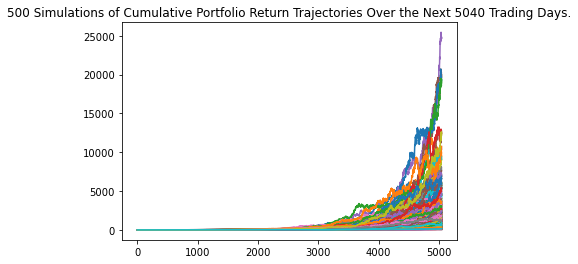

In [16]:
# Plot simulation outcomes
joes_line_plot = joes_MC_even_dist.plot_simulation()

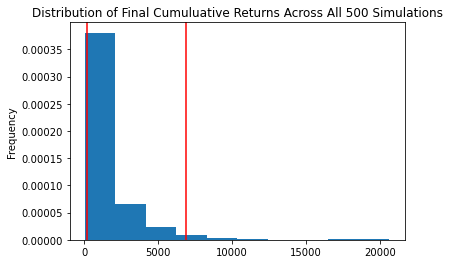

In [60]:
# Plot probability distribution and confidence intervals
joes_dist_plot = joes_MC_even_dist.plot_distribution()

In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
joes_even_tbl = joes_MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(joes_even_tbl)

count             500.000000
mean             1589.605760
std              2090.956921
min                38.429316
25%               461.997083
50%               932.771168
75%              1848.829604
max             20629.082215
95% CI Lower      147.783548
95% CI Upper     6886.168036
Name: 5040, dtype: float64


In [62]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000 investments in stocks
joes_even_ci_lower = round(joes_even_tbl[8]*30000,2)
joes_even_ci_upper = round(joes_even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $30,000 in the portfolio"
      f" over the next 20 years will end within in the range of"
      f" ${joes_even_ci_lower} and ${joes_even_ci_upper}.")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next 20 years will end within in the range of $4433506.44 and $206585041.07.


Larrys Monte Carlo Simulation

In [63]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp("2018-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()

# Set the ticker information
larrys_tickers = ['AA', 'NIO', 'PFE', 'XOM', 'ZNGA']

# Get 5 year's worth of historical price data
larrys_ticker = api.get_barset(
    larrys_tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
larrys_ticker.head()

AA                                 NIO           \
                            open    high    low  close   volume open high low   
time                                                                            
2018-05-24 00:00:00-04:00  48.62  49.440  48.55  49.15  1132704  NaN  NaN NaN   
2018-05-25 00:00:00-04:00  48.74  48.825  47.66  47.92  2154178  NaN  NaN NaN   
2018-05-29 00:00:00-04:00  47.57  47.950  46.82  47.30  1599177  NaN  NaN NaN   
2018-05-30 00:00:00-04:00  48.11  48.660  47.50  48.54  1353344  NaN  NaN NaN   
2018-05-31 00:00:00-04:00  49.98  50.430  47.81  48.06  2899262  NaN  NaN NaN   

                                        ...    XOM                       \
                          close volume  ...   open   high    low  close   
time                                    ...                               
2018-05-24 00:00:00-04:00   NaN    NaN  ...  81.35  81.36  79.95  80.26   
2018-05-25 00:00:00-04:00   NaN    NaN  ...  79.28  79.33  78.09  78.70   
2018-05-29 00:00:00-04:00   NaN    NaN  ...  78.15  78.73  77.53  78.40   
2018-05-30 00:00:00-04:00   NaN    NaN  ...  79.25  81.66  79.22  81.51   
2018-05-31 00:00:00-04:00   NaN    NaN  ...  80.81  81.55  80.69  81.24   

                                     ZNGA                                  
                             volume  open   high    low close      volume  
time                                                                       
2018-05-24 00:00:00-04:00   9966548  4.14  4.185  4.070  4.15   7431723.0  
2018-05-25 00:00:00-04:00  10994921  4.12  4.220  4.110  4.18   6848868.0  
2018-05-29 00:00:00-04:00  10346262  4.16  4.190  4.130  4.19   5380287.0  
2018-05-30 00:00:00-04:00  12728594  4.20  4.430  4.200  4.33  24457856.0  
2018-05-31 00:00:00-04:00   9428701  4.34  4.520  4.331  4.41  23173555.0  

[5 rows x 25 columns]

In [64]:
larrys_mc = MCSimulation(
    portfolio_data = larrys_ticker,
    weights = [.2, .2, .2, .2, .2],
    num_simulation = 1000,
    num_trading_days = 252*20)

In [65]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
larrys_mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.032971,0.979478,0.991516,1.013288,0.980196,0.987166,0.981734,0.989451,1.001963,0.987172,...,1.023245,1.000515,1.019973,1.009172,1.002538,0.990812,1.065502,1.008537,0.989656,1.003797
2,1.035031,0.988992,0.992823,1.018057,0.971374,0.983978,1.002116,0.977180,0.978880,0.990021,...,1.010492,1.006519,1.016295,1.000098,0.989341,0.992316,1.050025,0.996348,0.979679,1.016096
3,1.042052,0.993219,0.976803,1.042610,0.968119,0.984292,1.010299,0.977202,0.985123,0.997030,...,1.021126,1.018757,1.026725,1.016252,1.009474,0.987328,1.017174,1.001107,0.979731,1.038186
4,1.017110,1.019381,0.973652,1.027287,0.971629,0.992935,0.985480,1.019036,0.995370,0.982598,...,1.038860,1.031070,1.033006,1.021593,1.019946,0.986377,1.005243,1.016798,1.003002,1.034428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,273.777978,1512.296055,168.051750,153.441549,387.435823,522.096968,90.786552,850.964352,229.384169,176.951524,...,365.175341,157.143484,1090.833160,227.871839,1057.833519,3941.380338,51.765563,3341.216581,660.607698,29.778300
5037,280.402343,1492.939695,167.363630,157.410830,380.940123,518.348898,93.800607,863.197654,230.733252,181.969759,...,374.042470,153.759449,1086.851665,231.071445,1049.111978,4020.741577,51.337465,3372.265174,678.427006,29.911044
5038,275.005563,1501.080231,170.609010,158.038745,380.418917,524.083152,95.090814,863.116103,226.595914,183.371092,...,372.218630,153.159494,1073.224664,227.929604,1025.194405,3961.352533,50.342533,3362.631910,681.743195,29.961954
5039,270.407432,1519.458233,177.932212,154.213066,370.809975,520.718578,97.159302,835.787331,227.312485,186.313089,...,376.758477,156.416055,1100.831539,228.309348,972.986040,4000.538977,48.199544,3278.411448,680.295595,29.342671


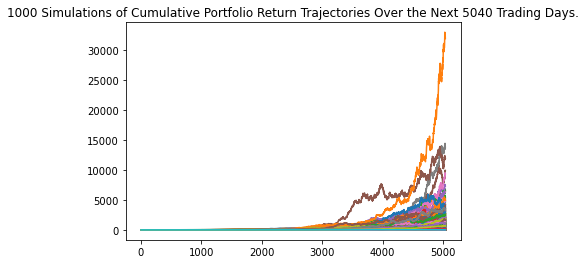

In [67]:
# Plot simulation outcomes
larrys_line_plot = larrys_mc.plot_simulation()

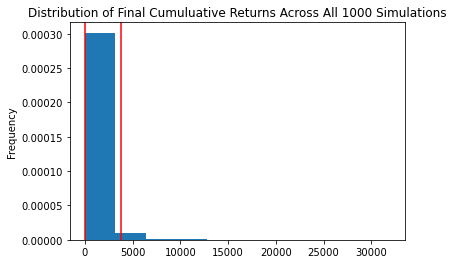

In [68]:
# Plot probability distribution and confidence intervals
larrys_dist_plot = larrys_mc.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
larry_tbl = larrys_mc.summarize_cumulative_return()

# Print summary statistics
print(larry_tbl)

count            1000.000000
mean              756.297182
std              1521.857473
min                 8.420768
25%               151.632879
50%               364.400340
75%               769.963463
max             31868.352705
95% CI Lower       30.190721
95% CI Upper     3781.163776
Name: 5040, dtype: float64


In [110]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments
larry_ci_lower = round(larry_tbl[8]*10000,2)
larry_ci_upper = round(larry_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${larry_ci_lower} and ${larry_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $337291.14 and $38015976.48.
